In [ ]:
import sqlite3

import pandas as pd

In [2]:
con = sqlite3.connect('data/database/snp.db')

Examples of how data is stored in database.

In [3]:
stmt = """
        SELECT * FROM snp
       """

snp = pd.read_sql(stmt, con)
snp

,id,exchange_url,symbol,security,sector,sub_industry,hq_location,date_added,CIK,founded
0,1,https://www.nyse.com/quote/XNYS:MMM,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,2,https://www.nyse.com/quote/XNYS:AOS,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,3,https://www.nyse.com/quote/XNYS:ABT,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,4,https://www.nyse.com/quote/XNYS:ABBV,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,5,https://www.nyse.com/quote/XNYS:ACN,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
...,...,...,...,...,...,...,...,...,...,...
495,496,https://www.nyse.com/quote/XNYS:XYL,XYL,Xylem Inc.,Industrials,Industrial Machinery & Supplies & Components,"White Plains, New York",2011-11-01,1524472,2011
496,497,https://www.nyse.com/quote/XNYS:YUM,YUM,Yum! Brands,Consumer Discretionary,Restaurants,"Louisville, Kentucky",1997-10-06,1041061,1997
497,498,https://www.nasdaq.com/market-activity/stocks/...,ZBRA,Zebra Technologies,Information Technology,Electronic Equipment & Instruments,"Lincolnshire, Illinois",2019-12-23,877212,1969
498,499,https://www.nyse.com/quote/XNYS:ZBH,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [4]:
stmt = """
        SELECT * FROM stock
       """

stock = pd.read_sql(stmt, con)
stock

,id,symbol,date,open,high,low,close,volume
0,1,MMM,2025-10-24,172.00,172.85,167.75,168.50,3612300
1,2,MMM,2025-10-23,167.22,171.63,166.71,171.60,4779100
2,3,MMM,2025-10-22,167.16,169.18,165.53,167.23,5275800
3,4,MMM,2025-10-21,158.00,166.82,152.80,166.64,7302200
4,5,MMM,2025-10-20,153.23,156.07,153.03,154.78,4230400
...,...,...,...,...,...,...,...,...
101995,101996,ZTS,2025-01-08,162.97,165.14,161.38,165.02,2353200
101996,101997,ZTS,2025-01-07,163.20,165.50,161.36,163.49,2488500
101997,101998,ZTS,2025-01-06,162.77,167.58,162.04,165.90,2733900
101998,101999,ZTS,2025-01-03,162.24,163.87,160.59,163.31,2206400


Query with window function calculating day-to-day returns as 'move'.

In [5]:
stmt = """
        SELECT snp.symbol, snp.security, snp.sector, snp.sub_industry, DATE(stock.date) as date, stock.close,
        ROUND((stock.close/LAG(stock.close, 1, 0) OVER (PARTITION BY snp.symbol ORDER BY date) - 1)*100, 2) as move
        FROM snp
        INNER JOIN stock ON snp.symbol=stock.symbol
       """

query = pd.read_sql(stmt, con)
query

,symbol,security,sector,sub_industry,date,close,move
0,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,2025-01-02,133.43,NaN
1,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,2025-01-03,135.69,1.69
2,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,2025-01-06,136.43,0.55
3,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,2025-01-07,137.41,0.72
4,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,2025-01-08,137.00,-0.30
...,...,...,...,...,...,...,...
101587,ZTS,Zoetis,Health Care,Pharmaceuticals,2025-10-20,145.06,0.69
101588,ZTS,Zoetis,Health Care,Pharmaceuticals,2025-10-21,146.09,0.71
101589,ZTS,Zoetis,Health Care,Pharmaceuticals,2025-10-22,147.11,0.70
101590,ZTS,Zoetis,Health Care,Pharmaceuticals,2025-10-23,146.39,-0.49


<Axes: ylabel='sector'>

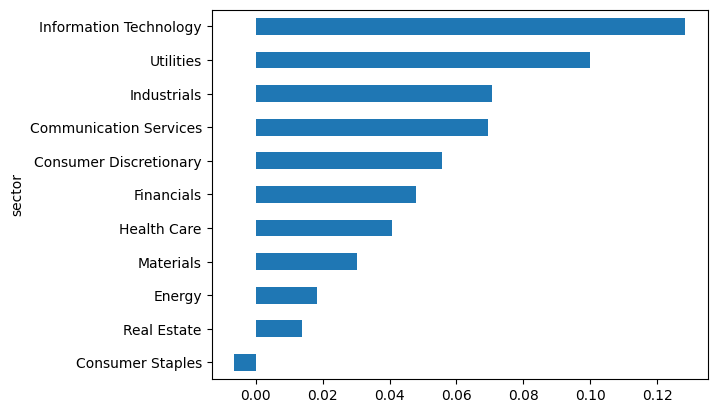

In [6]:
snp_agg = query.groupby('sector').agg({'move':['mean']})
snp_agg['move']['mean'].sort_values().plot.barh()